In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the CSV file
email_data = pd.read_csv('/content/emails.csv')  # Load the dataset

In [ ]:
print("First 20 rows of the dataset:\n", email_data.head(20))  # Display the first 20 rows

First 20 rows of the dataset:
    Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0    Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1    Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2    Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3    Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4    Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
5    Email 6    4   5    1    4    2   3   45    1    0  ...         0    0   
6    Email 7    5   3    1    3    2   1   37    0    0  ...         0    0   
7    Email 8    0   2    2    3    1   2   21    6    0  ...         0    0   
8    Email 9    2   2    3    0    0   1   18    0    0  ...         0    0   
9   Email 10    4   4   35    0    1   0   49    1   16  ...         0    0   
10  Email 11   22  14    2    9    2   2  104    0    2  ...         0    0   
11  Email 12   33  28

In [ ]:
# Check for missing values
print("Missing values:\n", email_data.isnull().sum())

Missing values:
 Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


X (Features):

Represents the independent variables used for prediction (columns 1 to 3000).



Y (Target):

Represents the dependent variable or the class labels.

0 = Non-spam email (ham.)

1 = Spam email.

In [ ]:
#Select features (X) and target variable (Y)
features = email_data.iloc[:, 1:3001]
target = email_data.iloc[:, -1].values

In [ ]:
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)


In [ ]:
#Train and Evaluate Multinomial Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  # Train the model using training data
nb_predictions = nb_model.predict(X_test)  # Predict labels for test data
print("\nMultinomial Naive Bayes Results:")
print("Accuracy Score: ", accuracy_score(y_test, nb_predictions))  # Evaluate accuracy
print("Classification Report:\n", classification_report(y_test, nb_predictions))  # Detailed report (precision, recall, F1-score)



Multinomial Naive Bayes Results:
Accuracy Score:  0.9466357308584686
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       913
           1       0.88      0.95      0.91       380

    accuracy                           0.95      1293
   macro avg       0.93      0.95      0.94      1293
weighted avg       0.95      0.95      0.95      1293



In [ ]:
#Train and Evaluate Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', gamma='auto')
svc_model.fit(X_train, y_train)  # Train the model using training data
svc_predictions = svc_model.predict(X_test)  # Predict labels for test data
print("\nSupport Vector Classifier Results:")
print("Accuracy Score: ", accuracy_score(y_test, svc_predictions))  # Evaluate accuracy
print("Classification Report:\n", classification_report(y_test, svc_predictions))  # Detailed report (precision, recall, F1-score)


Support Vector Classifier Results:
Accuracy Score:  0.8932714617169374
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       913
           1       0.87      0.74      0.80       380

    accuracy                           0.89      1293
   macro avg       0.89      0.85      0.87      1293
weighted avg       0.89      0.89      0.89      1293



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model using training data
rf_predictions = rf_model.predict(X_test)  # Predict labels for test data
print("\nRandom Forest Classifier Results:")
print("Accuracy Score: ", accuracy_score(y_test, rf_predictions))  # Evaluate accuracy
print("Classification Report:\n", classification_report(y_test, rf_predictions))  # Detailed report (precision, recall, F1-score)


Random Forest Classifier Results:
Accuracy Score:  0.974477958236659
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       913
           1       0.95      0.97      0.96       380

    accuracy                           0.97      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293



<ipython-input-19-1153d5851509>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


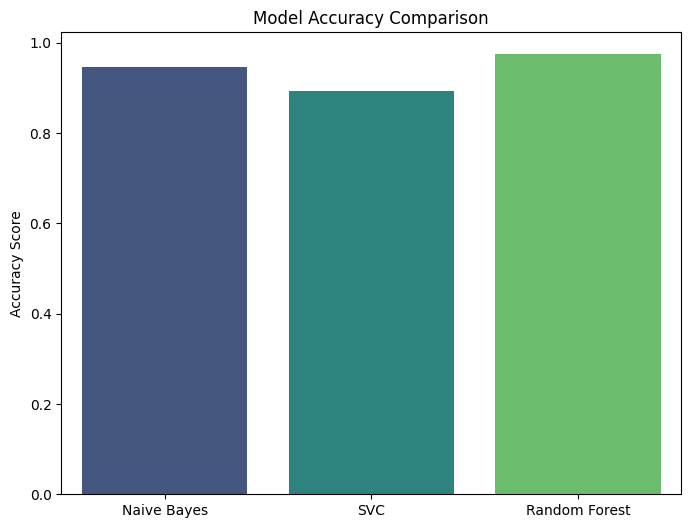

In [ ]:
# Accuracy scores for each model
models = ['Naive Bayes', 'SVC', 'Random Forest']
accuracy_scores = [
    accuracy_score(y_test, nb_predictions),
    accuracy_score(y_test, svc_predictions),
    accuracy_score(y_test, rf_predictions)
]

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.show()


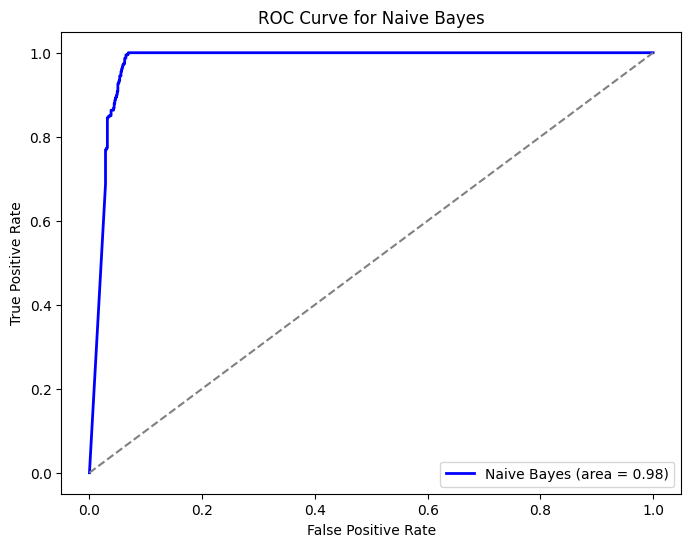

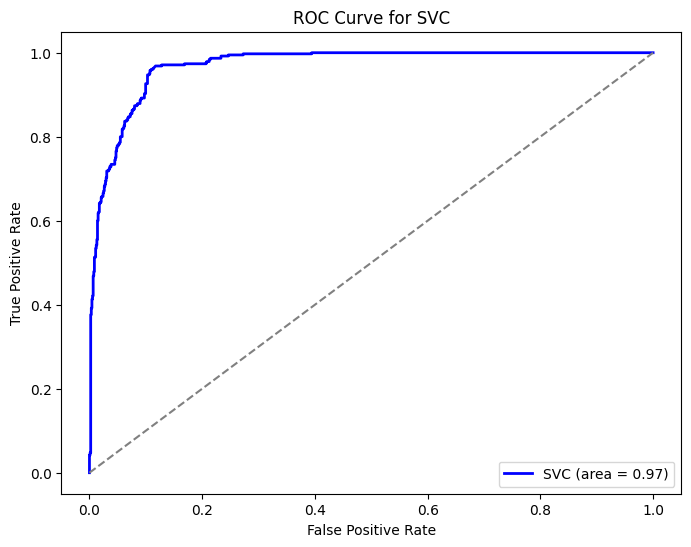

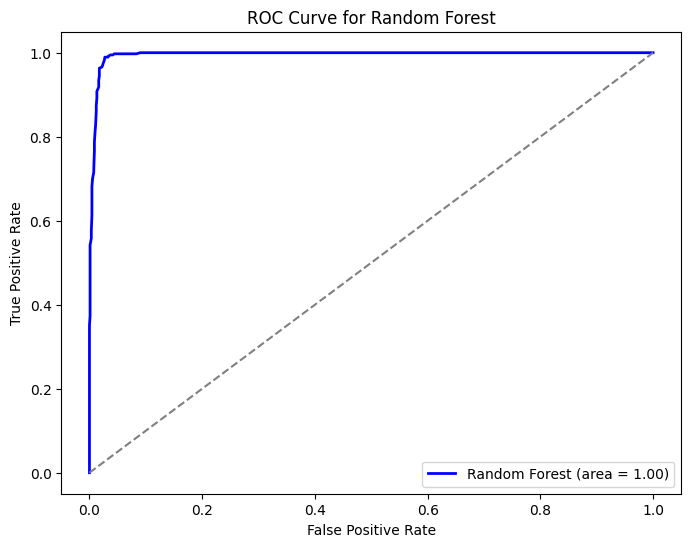

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# ROC curve for each model (you need the probability predictions for this)
# For Naive Bayes and Random Forest, use predict_proba instead of predict
plot_roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1], 'Naive Bayes')
plot_roc_curve(y_test, svc_model.decision_function(X_test), 'SVC')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest')
